In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
cd_full = pd.read_excel('D:/Credit data.xlsx')
from sklearn.ensemble import RandomForestRegressor

In [3]:
#去除重复值
cd_full.drop_duplicates(inplace=True)
cd_full.index = range(cd_full.shape[0])
cd_full["NumberOfDependents"].fillna(int(cd_full["NumberOfDependents"].mode()),inplace=True)
cd_full.index = range(cd_full.shape[0])

In [4]:
def fill_missing_rf(X,y,to_fill):
    """
    使用随机森林填补一个特征的缺失值的函数
    参数：
    X：要填补的特征矩阵
    y：完整的，没有缺失值的标签
    to_fill：字符串，要填补的那一列的名称
    """
    #构建我们的新特征矩阵和新标签
    df = X.copy()
    fill = df.loc[:,to_fill]
    df = pd.concat([df.loc[:,df.columns != to_fill],pd.DataFrame(y)],axis=1)
    #找出我们的训练集和测试集
    Ytrain = fill[fill.notnull()]
    Ytest = fill[fill.isnull()]
    Xtrain = df.iloc[Ytrain.index,:]
    Xtest = df.iloc[Ytest.index,:]
    #用随机森林回归来填补缺失值
    from sklearn.ensemble import RandomForestRegressor as rfr
    rfr = rfr(n_estimators=1000)
    rfr = rfr.fit(Xtrain, Ytrain)
    Ypredict = rfr.predict(Xtest)
    return Ypredict

In [5]:
X = cd_full.iloc[:,1:]
y = cd_full["SeriousDlqin2yrs"]
y_pred = fill_missing_rf(X,y,"MonthlyIncome")
cd_full.loc[cd_full.loc[:,"MonthlyIncome"].isnull(),"MonthlyIncome"] = y_pred

In [6]:
cd_full.index = range(cd_full.shape[0])
cd_full=cd_full
cd_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9996 entries, 0 to 9995
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      9996 non-null   int64  
 1   RevolvingUtilizationOfUnsecuredLines  9996 non-null   float64
 2   age                                   9996 non-null   int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  9996 non-null   int64  
 4   DebtRatio                             9996 non-null   float64
 5   MonthlyIncome                         9996 non-null   float64
 6   NumberOfOpenCreditLinesAndLoans       9996 non-null   int64  
 7   NumberOfTimes90DaysLate               9996 non-null   int64  
 8   NumberRealEstateLoansOrLines          9996 non-null   int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  9996 non-null   int64  
 10  NumberOfDependents                    9996 non-null   float64
dtypes: float64(4), in

In [7]:
cd_full.index = range(cd_full.shape[0])
def data_deal(cd_full):
    cd_full=cd_full[cd_full['RevolvingUtilizationOfUnsecuredLines']<=2]
    cd_full=cd_full[(cd_full['age']>=0)&(cd_full['age']<=100)]
    cd_full=cd_full[cd_full['NumberOfTime30-59DaysPastDueNotWorse']<24]
    cd_full=cd_full[cd_full['NumberOfTime60-89DaysPastDueNotWorse']<12]
    cd_full=cd_full[cd_full['NumberOfTimes90DaysLate']<8]
    cd_full=cd_full[cd_full['DebtRatio']<=2]
    cd_full=cd_full[cd_full['NumberOfDependents']<20]
    return cd_full
    
cd_full = data_deal(cd_full)
cd_full.index = range(cd_full.shape[0])
cd_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7923 entries, 0 to 7922
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      7923 non-null   int64  
 1   RevolvingUtilizationOfUnsecuredLines  7923 non-null   float64
 2   age                                   7923 non-null   int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  7923 non-null   int64  
 4   DebtRatio                             7923 non-null   float64
 5   MonthlyIncome                         7923 non-null   float64
 6   NumberOfOpenCreditLinesAndLoans       7923 non-null   int64  
 7   NumberOfTimes90DaysLate               7923 non-null   int64  
 8   NumberRealEstateLoansOrLines          7923 non-null   int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  7923 non-null   int64  
 10  NumberOfDependents                    7923 non-null   float64
dtypes: float64(4), in

NameError: name 'sns' is not defined

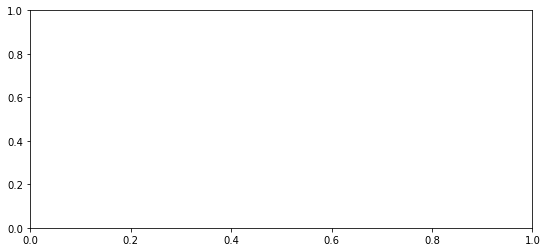

In [8]:
X = cd_full.iloc[:, 1:]
y = cd_full["SeriousDlqin2yrs"].values
print (X.shape, y.shape)

(7923, 10) (7923,)


In [9]:
X.info()
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7923 entries, 0 to 7922
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   RevolvingUtilizationOfUnsecuredLines  7923 non-null   float64
 1   age                                   7923 non-null   int64  
 2   NumberOfTime30-59DaysPastDueNotWorse  7923 non-null   int64  
 3   DebtRatio                             7923 non-null   float64
 4   MonthlyIncome                         7923 non-null   float64
 5   NumberOfOpenCreditLinesAndLoans       7923 non-null   int64  
 6   NumberOfTimes90DaysLate               7923 non-null   int64  
 7   NumberRealEstateLoansOrLines          7923 non-null   int64  
 8   NumberOfTime60-89DaysPastDueNotWorse  7923 non-null   int64  
 9   NumberOfDependents                    7923 non-null   float64
dtypes: float64(4), int64(6)
memory usage: 619.1 KB


AttributeError: 'numpy.ndarray' object has no attribute 'info'

In [10]:
from sklearn.model_selection import train_test_split
X = pd.DataFrame(X)
y = pd.DataFrame(y)

X_train, X_vali, Y_train, Y_vali = train_test_split(X,y,test_size=0.3,random_state=420)

model_data = pd.concat([Y_train, X_train], axis=1)
model_data.index = range(model_data.shape[0])

model_data.columns = data.columns
vali_data = pd.concat([Y_vali, X_vali], axis=1)
vali_data.index = range(vali_data.shape[0])
vali_data.columns = data.columns
model_data.info(),vali_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5546 entries, 0 to 5545
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      5546 non-null   int64  
 1   RevolvingUtilizationOfUnsecuredLines  5546 non-null   float64
 2   age                                   5546 non-null   int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  5546 non-null   int64  
 4   DebtRatio                             5546 non-null   float64
 5   MonthlyIncome                         5546 non-null   float64
 6   NumberOfOpenCreditLinesAndLoans       5546 non-null   int64  
 7   NumberOfTimes90DaysLate               5546 non-null   int64  
 8   NumberRealEstateLoansOrLines          5546 non-null   int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  5546 non-null   int64  
 10  NumberOfDependents                    5546 non-null   float64
dtypes: float64(4), in

(None, None)

In [11]:
model_data.to_csv(r"model_data.csv")
vali_data.to_csv(r"vali_data.csv")

[INFO] filtering variables ...
[INFO] creating woe binning ...


C:\ProgramData\Anaconda3\lib\site-packages\scorecardpy\woebin.py:934: UserWarning: Incorrect inputs; method should be tree or chimerge. Parameter was set to default (tree).
  warnings.warn("Incorrect inputs; method should be tree or chimerge. Parameter was set to default (tree).")


{'age': <Figure size 432x288 with 2 Axes>,
 'DebtRatio': <Figure size 432x288 with 2 Axes>,
 'NumberOfOpenCreditLinesAndLoans': <Figure size 432x288 with 2 Axes>,
 'NumberOfDependents': <Figure size 432x288 with 2 Axes>,
 'NumberRealEstateLoansOrLines': <Figure size 432x288 with 2 Axes>,
 'MonthlyIncome': <Figure size 432x288 with 2 Axes>,
 'NumberOfTimes90DaysLate': <Figure size 432x288 with 2 Axes>,
 'NumberOfTime30-59DaysPastDueNotWorse': <Figure size 432x288 with 2 Axes>,
 'RevolvingUtilizationOfUnsecuredLines': <Figure size 432x288 with 2 Axes>}

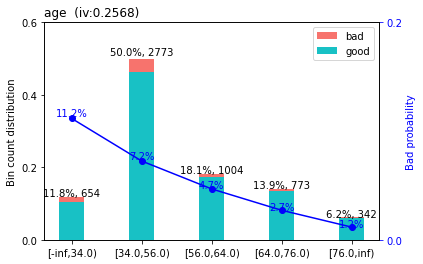

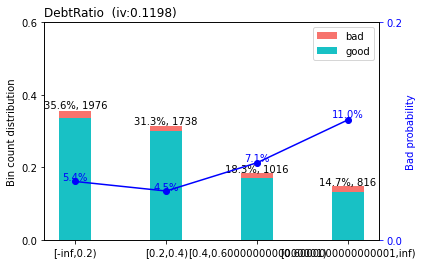

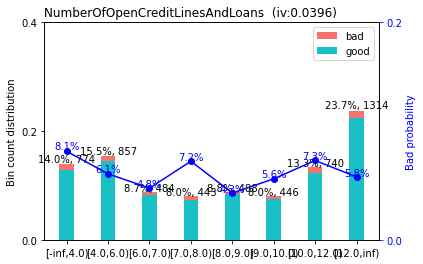

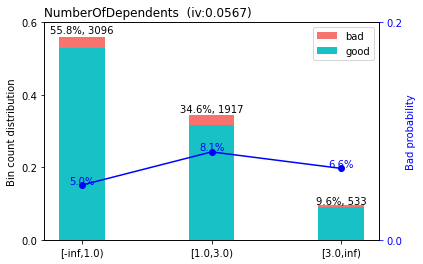

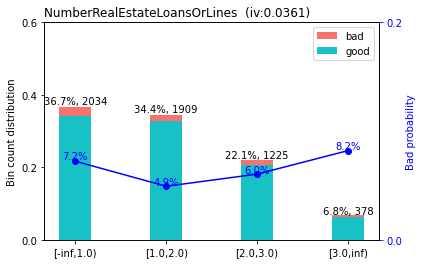

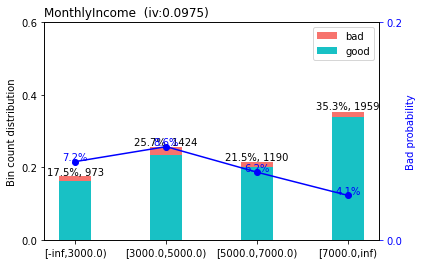

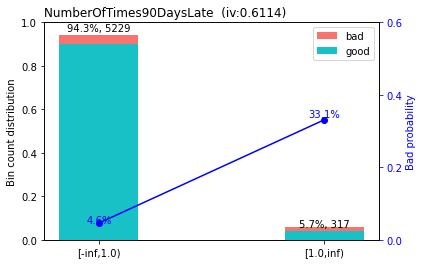

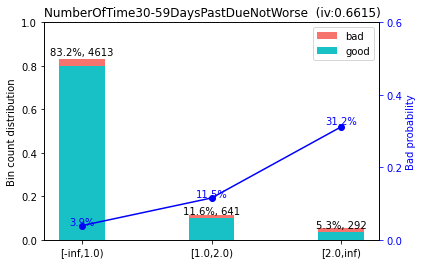

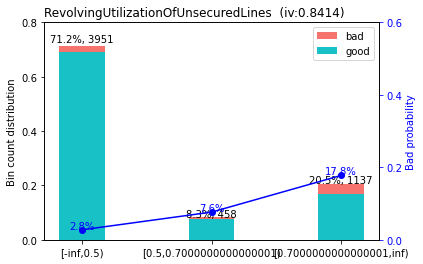

In [18]:
data_1= sc.var_filter(model_data, y="SeriousDlqin2yrs")
bins_model_data_1 = sc.woebin(data,y="SeriousDlqin2yrs",method="trees")
sc.woebin_plot(bins_model_data_1)

In [12]:
import scorecardpy as sc
model_data=pd.read_csv("model_data.csv")
vali_data=pd.read_csv("vali_data.csv")
data= sc.var_filter(model_data, y="SeriousDlqin2yrs")
bins_model_data = sc.woebin(data,y="SeriousDlqin2yrs",method="chimerge")

[INFO] filtering variables ...
[INFO] creating woe binning ...


{'age': <Figure size 432x288 with 2 Axes>,
 'DebtRatio': <Figure size 432x288 with 2 Axes>,
 'NumberOfOpenCreditLinesAndLoans': <Figure size 432x288 with 2 Axes>,
 'NumberOfDependents': <Figure size 432x288 with 2 Axes>,
 'NumberRealEstateLoansOrLines': <Figure size 432x288 with 2 Axes>,
 'MonthlyIncome': <Figure size 432x288 with 2 Axes>,
 'NumberOfTimes90DaysLate': <Figure size 432x288 with 2 Axes>,
 'NumberOfTime30-59DaysPastDueNotWorse': <Figure size 432x288 with 2 Axes>,
 'RevolvingUtilizationOfUnsecuredLines': <Figure size 432x288 with 2 Axes>}

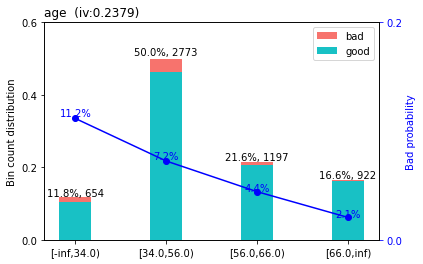

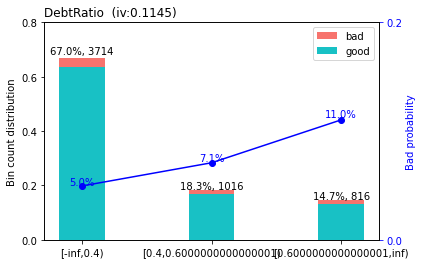

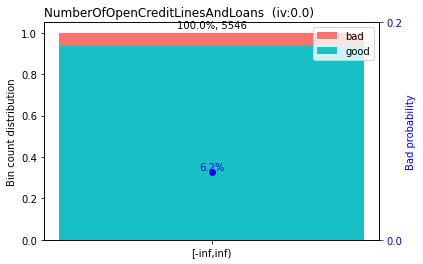

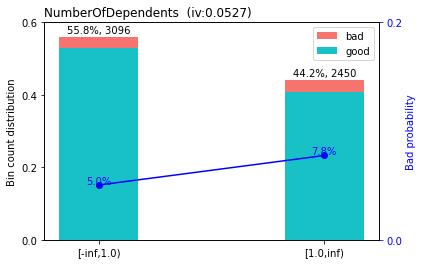

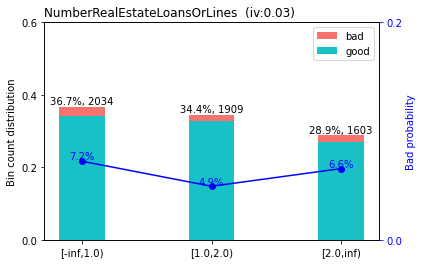

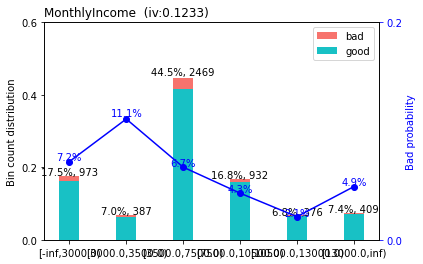

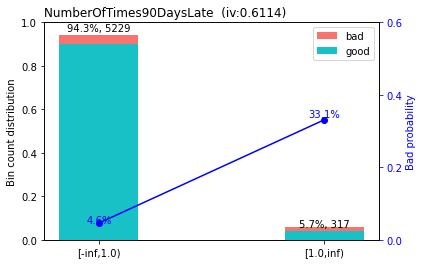

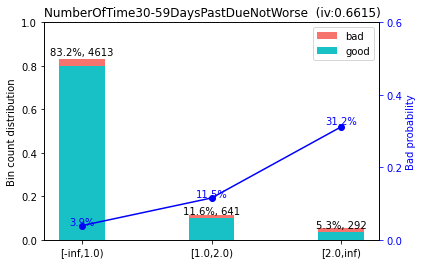

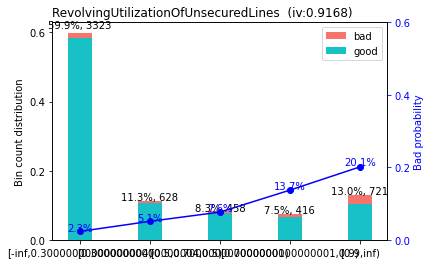

In [13]:
sc.woebin_plot(bins_model_data)

In [14]:
break_adj={
    'MonthlyIncome':[5000,7000,10500],
    'NumberOfDependents':[1.0],
    'NumberRealEstateLoansOrLines':[5.0],
    'DebtRatio':[0.1,0.3,0.7,0.8]
}
bins_adj = sc.woebin(data,y="SeriousDlqin2yrs",breaks_list=break_adj)

[INFO] creating woe binning ...


{'age': <Figure size 432x288 with 2 Axes>,
 'DebtRatio': <Figure size 432x288 with 2 Axes>,
 'NumberOfOpenCreditLinesAndLoans': <Figure size 432x288 with 2 Axes>,
 'NumberOfDependents': <Figure size 432x288 with 2 Axes>,
 'NumberRealEstateLoansOrLines': <Figure size 432x288 with 2 Axes>,
 'MonthlyIncome': <Figure size 432x288 with 2 Axes>,
 'NumberOfTimes90DaysLate': <Figure size 432x288 with 2 Axes>,
 'NumberOfTime30-59DaysPastDueNotWorse': <Figure size 432x288 with 2 Axes>,
 'RevolvingUtilizationOfUnsecuredLines': <Figure size 432x288 with 2 Axes>}

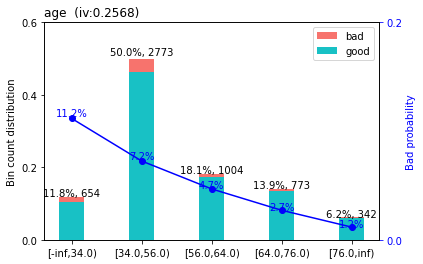

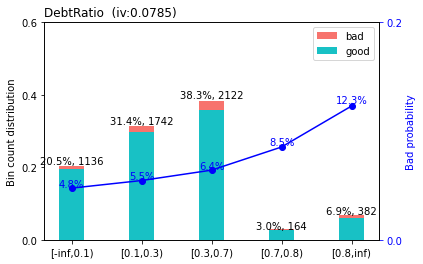

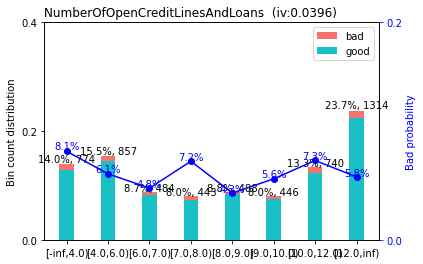

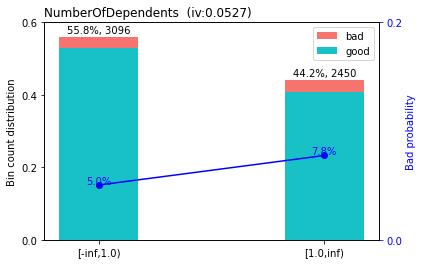

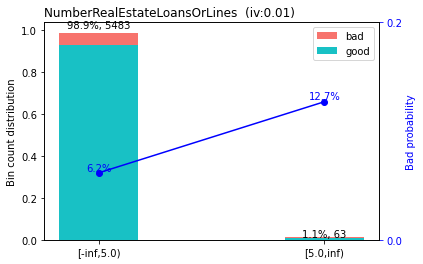

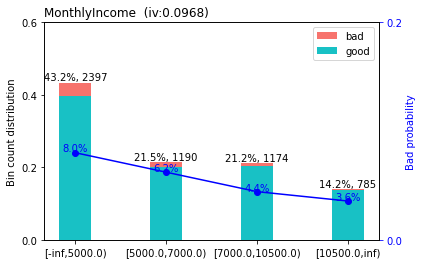

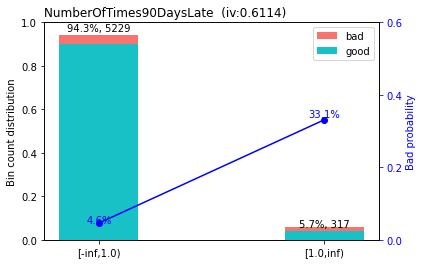

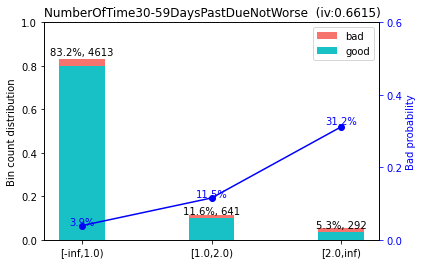

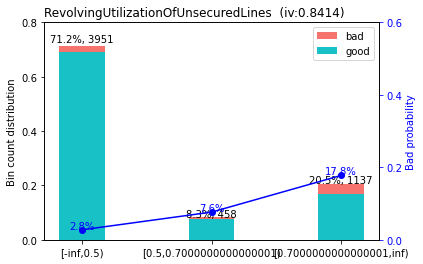

In [15]:
bins_adj = pd.concat(bins_adj).reset_index().drop(columns="level_0")
sc.woebin_plot(bins_adj)

In [16]:
#获取两个的WOE值
model_data_woe = sc.woebin_ply(model_data,bins_adj)
vali_data_woe = sc.woebin_ply(vali_data,bins_adj)

[INFO] converting into woe values ...
[INFO] converting into woe values ...


In [19]:
sc.iv(model_data_woe,"SeriousDlqin2yrs")

,variable,info_value
5,RevolvingUtilizationOfUnsecuredLines_woe,0.841388
1,NumberOfTime30-59DaysPastDueNotWorse_woe,0.661513
6,NumberOfTimes90DaysLate_woe,0.611397
2,NumberOfTime60-89DaysPastDueNotWorse,0.563168
0,age_woe,0.256754
3,MonthlyIncome_woe,0.096850
9,DebtRatio_woe,0.078508
10,NumberOfDependents_woe,0.052702
4,NumberOfOpenCreditLinesAndLoans_woe,0.039564
8,NumberRealEstateLoansOrLines_woe,0.009971


In [20]:
bins_adj

,level_1,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,0,age,"[-inf,34.0)",654,0.117923,581,73,0.111621,0.635684,0.063093,0.256754,34.0,False
1,1,age,"[34.0,56.0)",2773,0.500000,2572,201,0.072485,0.160841,0.013882,0.256754,56.0,False
2,2,age,"[56.0,64.0)",1004,0.181031,957,47,0.046813,-0.303681,0.014638,0.256754,64.0,False
3,3,age,"[64.0,76.0)",773,0.139380,752,21,0.027167,-0.868239,0.072864,0.256754,76.0,False
4,4,age,"[76.0,inf)",342,0.061666,338,4,0.011696,-1.726776,0.092278,0.256754,inf,False
5,0,DebtRatio,"[-inf,0.1)",1136,0.204832,1082,54,0.047535,-0.287607,0.014958,0.078508,0.1,False
6,1,DebtRatio,"[0.1,0.3)",1742,0.314100,1647,95,0.054535,-0.142859,0.006024,0.078508,0.3,False
7,2,DebtRatio,"[0.3,0.7)",2122,0.382618,1986,136,0.064090,0.028752,0.000320,0.078508,0.7,False
8,3,DebtRatio,"[0.7,0.8)",164,0.029571,150,14,0.085366,0.338397,0.003931,0.078508,0.8,False
9,4,DebtRatio,"[0.8,inf)",382,0.068878,335,47,0.123037,0.745992,0.053275,0.078508,inf,False


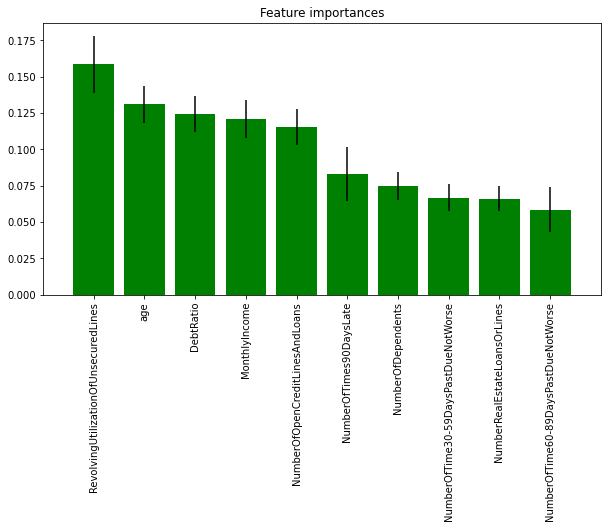

In [22]:

from sklearn import ensemble
cd_full_X = cd_full.drop(["SeriousDlqin2yrs"], axis=1)
cd_full_Y = np.log1p(cd_full["SeriousDlqin2yrs"].values)

model = ensemble.ExtraTreesRegressor(n_estimators=1000, max_features=10, max_depth=20, random_state=7)
model.fit(cd_full_X, cd_full_Y)

feat_names = cd_full_X.columns.values
feat_importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(feat_importances)[::-1][:20]

plt.figure(figsize=(10,5))
plt.title("Feature importances")
plt.bar(range(len(indices)), feat_importances[indices], yerr=std[indices], align="center", color="g")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()

In [24]:
model_data_woe = model_data_woe.drop(['DebtRatio_woe','NumberOfOpenCreditLinesAndLoans_woe','NumberOfDependents_woe','NumberRealEstateLoansOrLines_woe'],axis=1)
vali_data_woe = vali_data_woe.drop(['DebtRatio_woe','NumberOfOpenCreditLinesAndLoans_woe','NumberOfDependents_woe','NumberRealEstateLoansOrLines_woe'],axis=1)

In [25]:
model_data_woe = model_data_woe.loc[:, ~model_data_woe.columns.str.contains('^Unnamed')]
vali_data_woe = vali_data_woe.loc[:, ~vali_data_woe.columns.str.contains('^Unnamed')]
model_data_woe.to_csv(r"model_data_woe.csv",index=False)
vali_data_woe.to_csv(r"vali_data_woe.csv",index=False)

In [26]:
vali_data_woe.info(),model_data_woe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2377 entries, 0 to 2376
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   SeriousDlqin2yrs                          2377 non-null   int64  
 1   NumberOfTime60-89DaysPastDueNotWorse      2377 non-null   int64  
 2   age_woe                                   2377 non-null   float64
 3   MonthlyIncome_woe                         2377 non-null   float64
 4   NumberOfTimes90DaysLate_woe               2377 non-null   float64
 5   NumberOfTime30-59DaysPastDueNotWorse_woe  2377 non-null   float64
 6   RevolvingUtilizationOfUnsecuredLines_woe  2377 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 130.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5546 entries, 0 to 5545
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------               

(None, None)

In [27]:
from sklearn.linear_model import LogisticRegression
bankloan_lr = LogisticRegression(penalty='l1',C=0.9,solver='saga',n_jobs=-1)
model_data_woe=pd.read_csv("model_data_woe.csv")
bankloan_lr.fit(X=model_data_woe.iloc[:,1:],
                    y=model_data_woe['SeriousDlqin2yrs']
                   )

LogisticRegression(C=0.9, n_jobs=-1, penalty='l1', solver='saga')

In [28]:
coef_df=pd.concat([pd.DataFrame({'column':model_data_woe.columns[1:]}),
                   pd.DataFrame(np.transpose(bankloan_lr.coef_))],
                  axis=1
                 )
coef_df

,column,0
0,NumberOfTime60-89DaysPastDueNotWorse,0.389587
1,age_woe,0.640688
2,MonthlyIncome_woe,0.351743
3,NumberOfTimes90DaysLate_woe,0.506667
4,NumberOfTime30-59DaysPastDueNotWorse_woe,0.626056
5,RevolvingUtilizationOfUnsecuredLines_woe,0.614426


In [29]:
bankloan_lr.intercept_

array([-2.74786624])

In [30]:
predict_vali=bankloan_lr.predict(vali_data_woe.iloc[:, 1:])
probs_vali=bankloan_lr.predict_proba(vali_data_woe.iloc[:, 1:])
print(predict_vali,probs_vali)

[0 0 0 ... 0 0 0] [[0.92955045 0.07044955]
 [0.99143161 0.00856839]
 [0.94344559 0.05655441]
 ...
 [0.87975496 0.12024504]
 [0.90529022 0.09470978]
 [0.97732419 0.02267581]]


In [31]:
from sklearn.metrics import roc_auc_score,confusion_matrix
confusion_matrix(y_true = vali_data_woe['SeriousDlqin2yrs'], y_pred = predict_vali)

array([[2210,   16],
       [ 132,   19]], dtype=int64)

In [32]:
roc_auc_score(y_true = vali_data_woe['SeriousDlqin2yrs'],y_score = probs_vali[:,1])

0.8296769663757043

In [33]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(vali_data_woe['SeriousDlqin2yrs'],probs_vali[:,1])
auc = np.round(roc_auc_score(y_true = vali_data_woe['SeriousDlqin2yrs'],
                             y_score = probs_vali[:,1]),
               decimals = 3)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65292 (\N{FULLWIDTH COMMA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


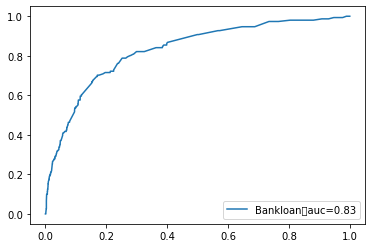

In [34]:
plt.plot(fpr,tpr,label="Bankloan，auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [40]:
#另外一个效果评估方法
#model_data_tree=pd.read_csv("model_data.csv")
#vali_data_tree=pd.read_csv("vali_data.csv")
#y_train = model_data["SeriousDlqin2yrs"].values
#y_train = vali_data["SeriousDlqin2yrs"].values
#train_perf = sc.perf_eva(y_train, predict_vali, title = "train") 
#vali_perf = sc.perf_eva(y_vail, test_pred, title = "vali")

ValueError: Number of rows must be a positive integer, not 1.0

<Figure size 432x288 with 0 Axes>

In [41]:
#计分板
bankloan_sc = sc.scorecard(bins_adj,bankloan_lr,
                           model_data_woe.columns[1:],
                           points0=600,
                           odds0=0.01,
                           pdo=50) 
bankloan_sc

{'basepoints':      variable  bin  points
 0  basepoints  NaN     466,
 'NumberOfTime60-89DaysPastDueNotWorse': Empty DataFrame
 Columns: [variable, bin, points]
 Index: [],
 'age':   variable          bin  points
 0      age  [-inf,34.0)   -29.0
 1      age  [34.0,56.0)    -7.0
 2      age  [56.0,64.0)    14.0
 3      age  [64.0,76.0)    40.0
 4      age   [76.0,inf)    80.0,
 'MonthlyIncome':          variable               bin  points
 22  MonthlyIncome     [-inf,5000.0)    -7.0
 23  MonthlyIncome   [5000.0,7000.0)     0.0
 24  MonthlyIncome  [7000.0,10500.0)     9.0
 25  MonthlyIncome     [10500.0,inf)    15.0,
 'NumberOfTimes90DaysLate':                    variable         bin  points
 26  NumberOfTimes90DaysLate  [-inf,1.0)    12.0
 27  NumberOfTimes90DaysLate   [1.0,inf)   -73.0,
 'NumberOfTime30-59DaysPastDueNotWorse':                                 variable         bin  points
 28  NumberOfTime30-59DaysPastDueNotWorse  [-inf,1.0)    22.0
 29  NumberOfTime30-59DaysPastDueNotWo

In [42]:
train_score = sc.scorecard_ply(model_data,bankloan_sc,print_step=0)
vali_score = sc.scorecard_ply(vali_data, bankloan_sc,print_step=0)
train_score.describe(), vali_score.describe()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


(             score
 count  5546.000000
 mean    506.103498
 std      72.573160
 min     218.000000
 25%     470.000000
 50%     524.000000
 75%     546.000000
 max     633.000000,
              score
 count  2377.000000
 mean    505.507783
 std      72.610528
 min     234.000000
 25%     462.000000
 50%     524.000000
 75%     552.000000
 max     633.000000)

In [43]:
#随机森林
from sklearn.ensemble import RandomForestClassifier
bankloan_rf_tree = RandomForestClassifier(n_estimators=1000,criterion='gini',max_features='auto',n_jobs=-1,random_state=7)
model_data_tree=pd.read_csv("model_data.csv")
vali_data_tree=pd.read_csv("vali_data.csv")
model_data_tree = model_data_tree.drop(columns='Unnamed: 0')
bankloan_rf_tree.fit(model_data_tree.iloc[:,1:],
                     model_data_tree['SeriousDlqin2yrs'])

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=7)

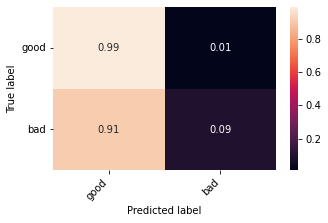

In [46]:
import seaborn as sns
rf_pred_class_vali = bankloan_rf_tree.predict(vali_data_tree.iloc[:, 1:])
rf_probs_vali = bankloan_rf_tree.predict_proba(vali_data_tree.iloc[:, 1:])
confusion_matrix_rf = confusion_matrix(y_true = vali_data_tree['SeriousDlqin2yrs'],
                                       y_pred = rf_pred_class_vali)
confusion_matrix_rf = confusion_matrix_rf.astype('float') / confusion_matrix_rf.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(confusion_matrix_rf,index=['good','bad'], 
                     columns=['good', 'bad'],
                     )
figsize = (5,3)
fontsize=10

fig = plt.figure(figsize=figsize)
heatmap = sns.heatmap(df_cm,annot=True, fmt='.2f')

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(),rotation=0,ha='right',fontsize=fontsize)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(),rotation=45,ha='right',fontsize=fontsize)

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

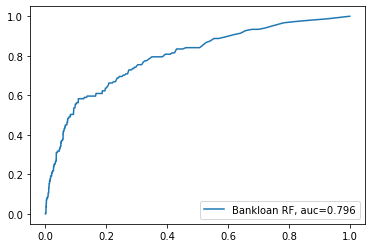

In [47]:
fpr, tpr, thresholds = roc_curve(vali_data_tree['SeriousDlqin2yrs'], rf_probs_vali[:,1])
auc_tree = np.round(roc_auc_score(vali_data_tree['SeriousDlqin2yrs'],
                                  y_score = rf_probs_vali[:,1]),
                                  decimals = 3)

plt.plot(fpr,tpr,label="Bankloan RF, auc="+str(auc_tree))
plt.legend(loc=4)
plt.show()

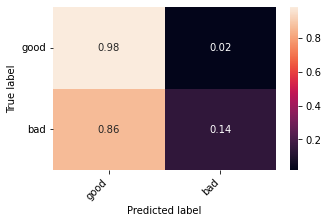

In [48]:
#XG方法
from sklearn.ensemble import GradientBoostingClassifier
bankloan_xg = GradientBoostingClassifier(loss='deviance',n_estimators=1000,random_state=2023,max_features='auto')
model_data_xg=model_data_tree
bankloan_xg.fit(model_data_xg.iloc[:,1:],
                model_data_xg['SeriousDlqin2yrs'])
vali_data_xg=vali_data_tree
xg_pred_class_vali = bankloan_xg.predict(vali_data_xg.iloc[:,1:])
xg_probs_vali = bankloan_xg.predict_proba(vali_data_xg.iloc[:,1:])
confusion_matrix_xg = confusion_matrix(y_true = vali_data_xg['SeriousDlqin2yrs'],
                                       y_pred = xg_pred_class_vali)
confusion_matrix_xg = confusion_matrix_xg.astype('float') / confusion_matrix_xg.sum(axis=1)[:, np.newaxis]
df_cm_xg = pd.DataFrame(confusion_matrix_xg,index=['good','bad'], 
                     columns=['good', 'bad'],
                     )
figsize_xg = (5,3)
fontsize_xg=10

fig = plt.figure(figsize=figsize_xg)
heatmap = sns.heatmap(df_cm_xg,annot=True, fmt='.2f')

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(),rotation=0,ha='right',fontsize=fontsize_xg)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(),rotation=45,ha='right',fontsize=fontsize_xg)

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

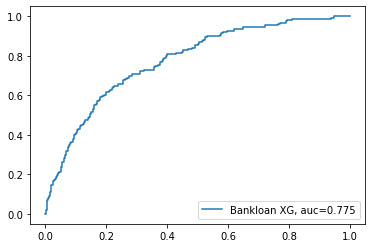

In [49]:
fpr, tpr, thresholds = roc_curve(vali_data_xg['SeriousDlqin2yrs'], xg_probs_vali[:,1])
auc_xg = np.round(roc_auc_score(vali_data_xg['SeriousDlqin2yrs'],
                                  y_score = xg_probs_vali[:,1]),
                                  decimals = 3)

plt.plot(fpr,tpr,label="Bankloan XG, auc="+str(auc_xg))
plt.legend(loc=4)
plt.show()